Prim


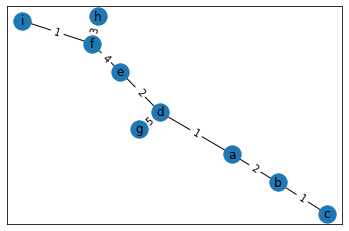

[['a', 'b'], ['a', 'd'], ['b', 'c'], ['c', 'e'], ['e', 'f'], ['e', 'g'], ['f', 'h'], ['f', 'i']]
Kruskal


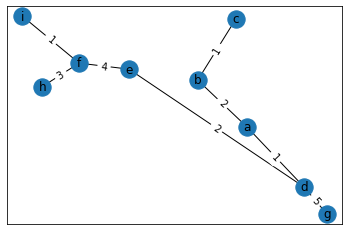

In [18]:
import heapq

import networkx as nx
from matplotlib import pyplot as plt
from networkx.algorithms import tree
from networkx.drawing.nx_agraph import write_dot

from UnionFind import UF


def prim(graph: nx.Graph) -> nx.Graph:
    f = set()
    dist = {v: float("inf") for v in graph}
    dist[list(graph.nodes())[0]] = 0
    prev = dict()
    unvisited = [(dist[n], n) for n in graph]
    heapq.heapify(unvisited)
    while len(unvisited):
        current = heapq.heappop(unvisited)[1]
        f.add(current)
        for n in graph[current]:
            if n in f:
                continue
            l = graph[current][n]['weight']
            if l < dist[n]:
                dist[n] = l
                prev[n] = current
        unvisited = [(dist[v], v) for v in graph if not v in f]
        heapq.heapify(unvisited)
    spanning_tree = nx.Graph()
    for k, v in prev.items():
        spanning_tree.add_edge(k, v, weight=graph[k][v]["weight"])
    return spanning_tree


def kruskal(graph: nx.Graph):
    B = list(graph.edges)
    S = set()
    UnionFind = UF(graph.nodes())

    while len(B) != 0:
        minEdge = min((graph[e[0]][e[1]]['weight'], e) for e in B)[1]

        p = UnionFind.find(minEdge[0])
        q = UnionFind.find(minEdge[1])

        if p != q:
            S.add(minEdge)
            UnionFind.union(p, q)

        B.remove(minEdge)

    return S


def Kruskal2(graph):
    tree = nx.Graph()
    tree.add_nodes_from(graph)
    h = UF(graph.nodes)

    for (u, v, a) in sorted([(u, v, a) for (u, v, a) in graph.edges(data=True)], key=lambda a: a[2]['weight']):
        setu = h.find(u)
        setv = h.find(v)
        if setu != setv:
            tree.add_edge(u, v, weight=a['weight'])
            h.union(setu, setv)
    return tree


G1 = nx.Graph()

G1.add_edge("a", "b", weight=2)
G1.add_edge("a", "d", weight=1)
G1.add_edge("b", "c", weight=1)
G1.add_edge("b", "e", weight=2)
G1.add_edge("b", "d", weight=3)
G1.add_edge("c", "e", weight=2)
G1.add_edge("c", "f", weight=7)
G1.add_edge("d", "e", weight=2)
G1.add_edge("d", "g", weight=5)
G1.add_edge("e", "g", weight=5)
G1.add_edge("e", "f", weight=4)
G1.add_edge("e", "h", weight=5)
G1.add_edge("g", "h", weight=5)
G1.add_edge("f", "h", weight=3)
G1.add_edge("f", "i", weight=1)
G1.add_edge("h", "i", weight=3)

print("Prim")
sp = prim(G1)

pos = nx.spring_layout(sp)
nx.draw_networkx(sp, pos)
labels = nx.get_edge_attributes(sp, 'weight')
nx.draw_networkx_edge_labels(sp, pos, edge_labels=labels)
plt.show()

mst = tree.minimum_spanning_edges(G1, algorithm="prim", data=False)
edgelist = list(mst)
print(sorted(sorted(e) for e in edgelist))

write_dot(sp, "./prim_spanning_tree.dot")

print("Kruskal")
S = Kruskal2(G1)

pos = nx.spring_layout(S)  # pos = nx.nx_agraph.graphviz_layout(G)
nx.draw_networkx(sp, pos)
labels = nx.get_edge_attributes(sp, 'weight')
nx.draw_networkx_edge_labels(S, pos, edge_labels=labels)
plt.show()

write_dot(S, "./kruskal_spanning_tree.dot")


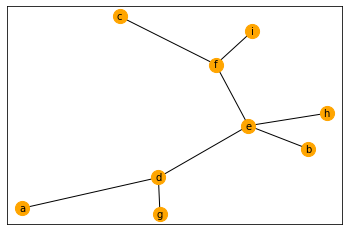

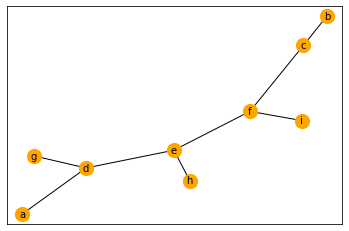

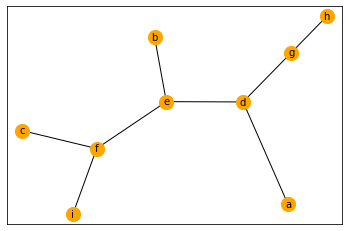

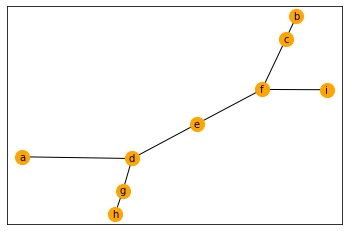

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
from typing import List
from networkx.drawing.nx_agraph import write_dot


def expand(G: nx.Graph, explored_nodes, explored_edges):
    frontier_nodes = list()
    frontier_edges = list()
    for v in explored_nodes:
        for u in G.neighbors(v):
            if not (u in explored_nodes):
                frontier_nodes.append(u)
                frontier_edges.append([(u, v), (v, u)])

    return zip([explored_nodes | frozenset([v]) for v in frontier_nodes],
               [explored_edges | frozenset(e) for e in frontier_edges])


def find_all_spanning_trees(G: nx.Graph, root=0) -> List[nx.Graph]:
    # initialise solution
    explored_nodes = frozenset([root])
    explored_edges = frozenset([])
    solutions = [(explored_nodes, explored_edges)]
    # we need to expand solutions number_of_nodes-1 times
    for ii in range(G.number_of_nodes() - 1):
        # get all new solutions
        solutions = [expand(G, nodes, edges) for (nodes, edges) in solutions]
        # flatten nested structure and get unique expansions
        solutions = set([item for sublist in solutions for item in sublist])

    return [nx.from_edgelist(edges) for (nodes, edges) in solutions]


G1 = nx.Graph()
G1.add_edge("a", "d", weight=1)
G1.add_edge("d", "e", weight=2)
G1.add_edge("d", "g", weight=3)
G1.add_edge("e", "b", weight=4)
G1.add_edge("e", "f", weight=2)
G1.add_edge("e", "h", weight=4)
G1.add_edge("b", "c", weight=4)
G1.add_edge("c", "f", weight=1)
G1.add_edge("f", "i", weight=3)
G1.add_edge("g", "h", weight=4)

ST = find_all_spanning_trees(G1, 'a')

i = 0
for g in ST:
    for (u, v) in g.edges():
        g[u][v]["weight"] = G1[u][v]["weight"]
        g[u][v]["label"] = G1[u][v]["weight"]
    weightSum = 0
    for (u, v) in g.edges():
        weightSum += int(g[u][v]["weight"])
    if weightSum > 20:
        continue
    i += 1

    pos = nx.spring_layout(g)  # pos = nx.nx_agraph.graphviz_layout(G)
    labels = nx.get_edge_attributes(g, 'weight')
    fig, ax = plt.subplots(1, 1)
    nx.draw_networkx(g, pos=pos, with_labels=True, node_size=200, node_color='orange', font_size=10, ax=ax)
    plt.show()
    write_dot(g, "./all_spanning_trees/" + str(i) + ".dot")

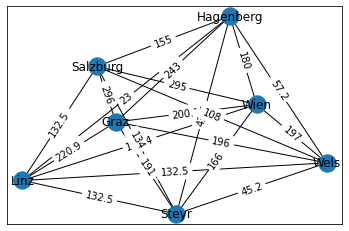

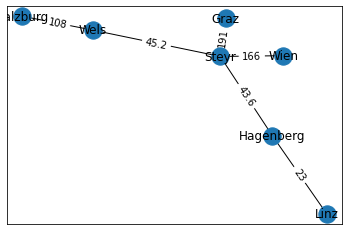

In [20]:
import networkx as nx

G = nx.Graph()
G.add_weighted_edges_from([
    ("Wien", "Linz", 184.4),
    ("Wien", "Hagenberg", 180),
    ("Wien", "Graz", 200.1),
    ("Wien", "Salzburg", 295),
    ("Wien", "Steyr", 166),
    ("Wien", "Wels", 197),
    ("Linz", "Hagenberg", 23),
    ("Linz", "Graz", 220.9),
    ("Linz", "Salzburg", 132.5),
    ("Linz", "Wels", 132.5),
    ("Linz", "Steyr", 132.5),
    ("Salzburg", "Steyr", 134),
    ("Salzburg", "Graz", 296),
    ("Salzburg", "Wels", 108),
    ("Salzburg", "Hagenberg", 155),
    ("Graz", "Steyr", 191),
    ("Graz", "Wels", 196),
    ("Graz", "Hagenberg", 243),
    ("Wels", "Steyr", 45.2),
    ("Wels", "Hagenberg", 57.2),
    ("Steyr", "Hagenberg", 43.6)
])

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

sp = nx.minimum_spanning_tree(G, algorithm="prim", weight="weight", ignore_nan=False)

pos = nx.spring_layout(sp)
nx.draw_networkx(sp, pos)
labels = nx.get_edge_attributes(sp, 'weight')
nx.draw_networkx_edge_labels(sp, pos, edge_labels=labels)
plt.show()
write_dot(sp, "tsp_mst.dot")

G2 = nx.DiGraph()

for (u, v) in sp.edges():
    pass

